##Do needed imports!

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import files
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

plt.rcParams['figure.figsize'] = (8, 8)

In [ ]:
# Upload the file from your local system
uploaded = files.upload()

# Assuming you've uploaded 'cardio_train.xlsx', read it into a pandas DataFrame
file_name = "orbit.csv"  # Make sure this matches the name of the file you uploaded
data = pd.read_csv(file_name)

# Print the original data to verify it's loaded correctly
print("Original Data:")
print(data.head())

Saving orbit.csv to orbit (12).csv
Original Data:
   time_steps           y
0  -10.000000  100.000000
1   -9.989995   99.800000
2   -9.979990   99.600200
3   -9.969985   99.400601
4   -9.959980   99.201201


##Seperate data to numpy array

In [ ]:
time_steps = data['time_steps'].to_numpy()
y_positions = data['y'].to_numpy()

##Splitting data


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(time_steps, y_positions, test_size=0.2, random_state=42)

##Feature Engineering

In [ ]:
# Add squared and cubed time_steps as additional features
X_train = np.column_stack((X_train, X_train**2, X_train**3))
X_test = np.column_stack((X_test, X_test**2, X_test**3))


##Data preprocessing


In [ ]:
# Standardize the input features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


##Build the model

In [ ]:
# Instantiate a Sequential model
model = Sequential()

# Add a Dense layer with 50 neurons and an input of 1 neuron
model.add(Dense(50, input_shape=(3, ), activation='relu'))

# Add two Dense layers with 50 neurons and relu activation
model.add(Dense(50, activation='relu'))
model.add(Dense(50, activation='relu'))

# End your model with a Dense layer and no activation
model.add(Dense(1))

##Compile the model

In [ ]:
# Compile your model
model.compile(optimizer='adam', loss='mse')

print('Training started..., this can take a while:')



Training started..., this can take a while:


##Train and Evalute the model

In [ ]:
# Fit your model on your training data
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test), verbose=1)
#use early stopping
# Evaluate your model on the test set
print("Final loss value:", model.evaluate(X_test, y_test))


Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 1933.5636 - val_loss: 1377.3048
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 887.0600 - val_loss: 50.3144
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 34.3834 - val_loss: 6.9009
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.1871 - val_loss: 2.8954
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5003 - val_loss: 1.0737
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.9367 - val_loss: 0.4007
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3671 - val_loss: 0.2139
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2301 - val_loss: 0.1447
Epoch 9/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1592 - val_loss: 0.1050
Epoch 10/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.1155 - val_loss: 0.0828
Epoch 11/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0834 - val_loss: 0.0602
Epoch 12/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.070

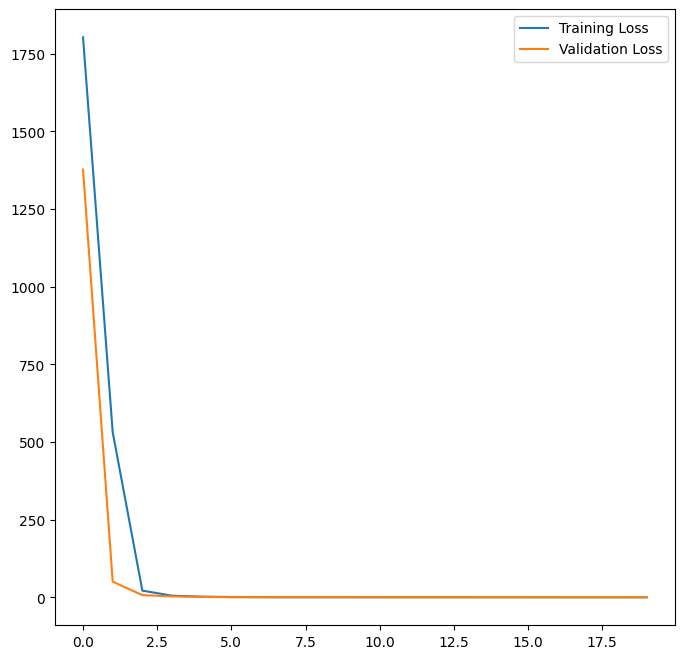

In [ ]:
# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()

##Predict with the model

In [ ]:
def plot_orbit(model_preds):
    axeslim = int(len(model_preds) / 2)
    plt.plot(np.arange(-axeslim, axeslim + 1),np.arange(-axeslim, axeslim + 1) ** 2,
             color="mediumslateblue")
    plt.plot(np.arange(-axeslim, axeslim + 1),model_preds,color="orange")
    plt.axis([-40, 41, -5, 550])
    plt.legend(["Scientist's Orbit", 'Your orbit'],loc="lower left")
    plt.title("Predicted orbit vs Scientist's Orbit")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


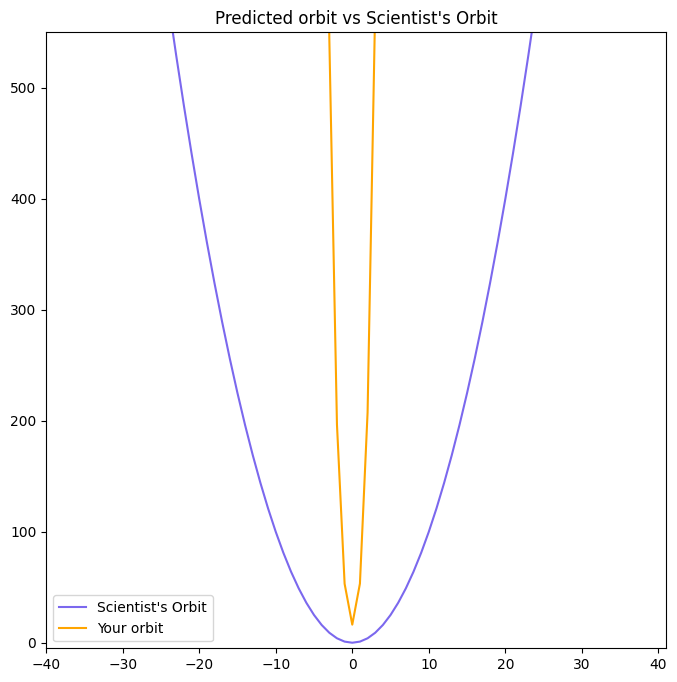

In [ ]:
# Predict the eighty minute orbit
input_data = np.arange(-40, 41).reshape(-1, 1)
input_data = np.column_stack((input_data, input_data**2, input_data**3))
eighty_min_orbit = model.predict(input_data)

# Plot the eighty minute orbit
plot_orbit(eighty_min_orbit)

Your model fits perfectly to the scientists trajectory for time values between -10 to +10, the region where the meteor crosses the impact region, so we won't be hit! However, it starts to diverge when predicting for new values we haven't trained for. This shows neural networks learn according to the data they are fed with. Data quality and diversity are very important!